#  <center> VISIÓN ARTIFICIAL </center>
### Fundamentos del color


<hr>


## Manejo básico de imágenes



Una imagen con un solo canal (matriz bidimensional) se conoce como imagen en escala de grises. Usualmente las principales técnicas de procesamiento de imágenes se aplican sobre imágenes de este tipo.
<br><br>
Cuando se habla de imágenes a color, el modelo más utilizado es el RGB. Una imagen a color en el espacio RGB, es una matriz 3-dimensional o una composición de tres imagenes a escala de grises, cada una conteniendo los valores de cada canal. Por convención, el canal 0 es el color Rojo, el canal 1 es el color Verde y el canal 2 es el color Azul.


<img src="res/img1.png"/>

A continuación, importemos las tres librerías que utilizaremos para el desarrollo de la clase: Matplotlib, Numpy, OpenCV.

In [2]:
%matplotlib inline 
#Magic para mostrar imágenes en Jupyter usando matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt

Hablemos un poco de la función *imread* de OpenCV. Esta función recibe dos parámetros: una cadena que especifica la ruta de la imagen (obligatorio), y una bandera que indicará cómo queremos leer la imagen (opcional).

    cv2.IMREAD_COLOR : Carga la imagen a color, omitiendo transparencias. Es la bandera por defecto.
    cv2.IMREAD_GRAYSCALE : Carga la imagen en escala de grises.
    cv2.IMREAD_UNCHANGED : Carga la imagen como tal, incluyendo el canal alpha si existe.

**Nota:** OpenCV cuenta con banderas para otras funciones. Basta con saber cuando una función recibe banderas como parámetro y buscar en la documentación de la misma.

Leamos una imagen en escala de grises y mostrémosla utilizando la función *imshow* del módulo pyplot de matplotlib. Esta función tiene muchos parámetros que iremos detallando durante el transcurso del curso. Sin embargo, es una buena idea echar un vistazo a la documentación:

http://matplotlib.org/users/image_tutorial.html <br>
https://matplotlib.org/api/pyplot_api.html <br>
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html <br>
https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/ <br>
https://www.labri.fr/perso/nrougier/teaching/matplotlib/


Afortunadamente, la mayoría de parámetros que recibe la función *imshow* son opcionales. Para este primer ejemplo le pasaremos a la función únicamente la imagen (obligatorio) y la variable **cmap** (de color map). El mapa de color solo puede ser utilizado para imágenes de un único canal, pero puede ser muy útil cuando queremos discernir mejor la variación entre niveles de gris.

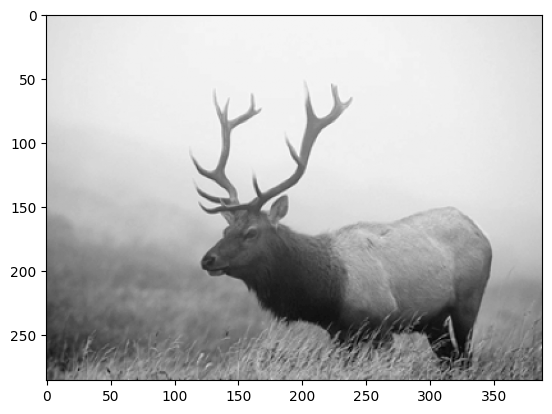

In [3]:
img = cv2.imread("res/alce.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray") #gray, hot, jet...

### Las imágenes en escala de grises son arreglos bidimensionales, esto quiere decir que podemos acceder a un píxel arbitrario tal como lo haríamos en una matriz.

In [4]:
print(img[200,250])

185


### Gracias a la simplicidad de Python podemos extraer "slices" (tajadas) de la imagen por medio de operaciones de indexación. Para este fin, es importante revisar la documentación de numpy sobre slicing.

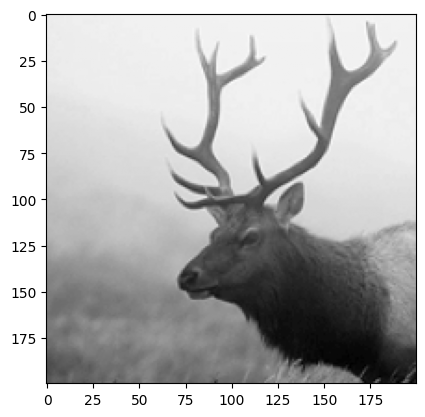

In [5]:
img_slice = img[50:250,50:250] #Si nuestra imagen fuese a color, bastaría con añadir
                               #un tercer indice: img[50:250,50:250,:]
                               # : equivale a los valores mínimo y máximo del arreglo,
                               # nos permite conservar todos los valores en una dimensión dada
                               # y efectuar slicing en otra.
plt.imshow(img_slice, cmap="gray")


### El slicing también se puede usar para asignar valores. En este caso manipulamos la imagen, por lo que es conveniente crear una copia.

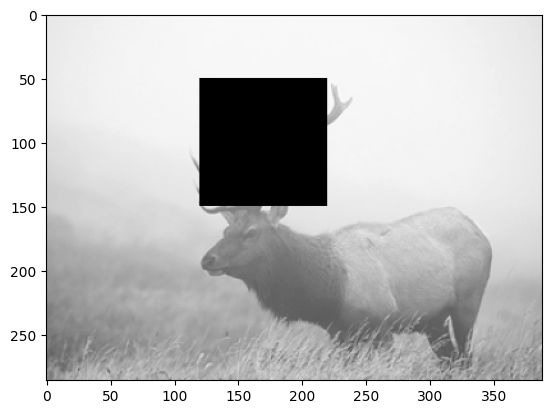

In [6]:
img = cv2.imread("res/alce.png", cv2.IMREAD_GRAYSCALE)
img_with_hole = img.copy()
img_with_hole[50:150,120:220] = 0 
plt.imshow(img_with_hole, cmap="gray")

### También podemos guardar la imagen, con el comando *imwrite*.

In [6]:
cv2.imwrite("alce_sin_ornamenta.jpg", img_with_hole);

### Ahora leamos una imagen a color...

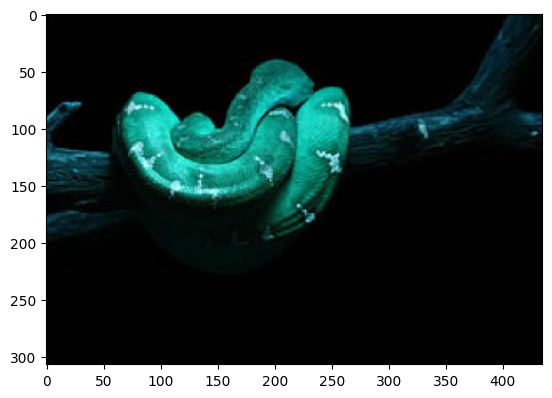

In [7]:
img_color = cv2.imread("res/serpiente.png", cv2.IMREAD_COLOR)
plt.imshow(img_color)


# ATENCIÓN

OpenCV maneja el modelo de color BGR, donde el canal principal 0 representa al color azul, el canal 1 representa al color verde, y el canal 2 representa al color rojo. Esto significa que al momento de leer una imagen con OpenCV, si queremos mostrarla con alguna librería como Matplotlib, esta tendrá los colores invertidos, como se observa arriba.

¿Cómo solucionamos este problema? Pensemos en una posible solución. Entre tanto, verifiquemos algunas de las propiedades que podemos extraer de una imagen...

In [8]:
img_type = type(img_color)
print("El tipo de estructura de datos de la imagen: ", img_type)

El tipo de estructura de datos de la imagen:  <class 'numpy.ndarray'>


In [9]:
#Se aplica datatype y shape para conocer tipo de datos y dimensiones respectivamente
img_datatype = img_color.dtype
img_shape = np.shape(img_color) 
#Fracción para saber la tasa anchura/altura, aunque pueden obtenerse muchas mas relaciones entre dimensionalidad
img_ratio = img_shape[1] / img_shape[0]
print("El tipo de datos de la imagen: ", img_datatype)
print("Las dimensiones de la imagen: ", img_shape)
print("La tasa anchura/altura de la imagen:  ", img_ratio)

El tipo de datos de la imagen:  uint8
Las dimensiones de la imagen:  (307, 435, 3)
La tasa anchura/altura de la imagen:   1.4169381107491856


Arreglemos nuestra imagen a color de la manera "larga": creamos una imagen vacía y a esa imagen vacía le asignamos los canales de color de la imagen en BGR con orden inverso.

In [10]:
#Crear una matriz de ceros, del tamaño de la imagen original y el mismo tipo de datos
img_fixed = np.zeros(img_shape, dtype=np.uint8)
#Enviar la información del canal 0 del espacio BGR (B) al canal 2 del espacio RGB (que sigue siendo B)
img_fixed[:,:,0] = img_color[:,:,2]
img_fixed[:,:,1] = img_color[:,:,1]
img_fixed[:,:,2] = img_color[:,:,0]

Nota: Utilizando matplotlib, podemos mostrar más de una imagen a la vez...


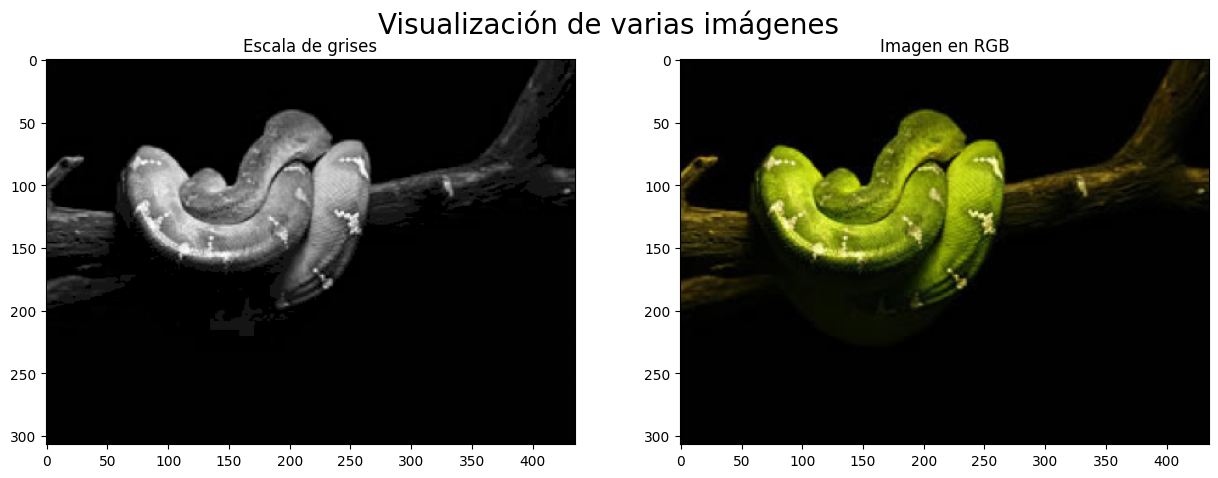

In [11]:
#Se lee la imagen en escala de grises y a color respectivamente (Se utiliza el parámetro #2 en la función para definirlo)
img_gray = cv2.imread("res/serpiente.png", cv2.IMREAD_GRAYSCALE)
img_color = cv2.imread("res/serpiente.png", cv2.IMREAD_COLOR)
#Se crea el subplot 1x2 para mostrar las imagenes
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
#Se le da título a las figuras, título a cada imagen y se muestran las imágenes 
fig.suptitle('Visualización de varias imágenes', fontsize=20)
ax1.set_title('Escala de grises')
ax1.imshow(img_gray, cmap='gray', aspect='auto')
ax2.set_title('Imagen en RGB')
ax2.imshow(img_fixed, cmap='gray', aspect='auto')


### Nota: OpenCV tiene la función cvtColor, que nos permite cambiar con facilidad entre espacios o modelos de color...

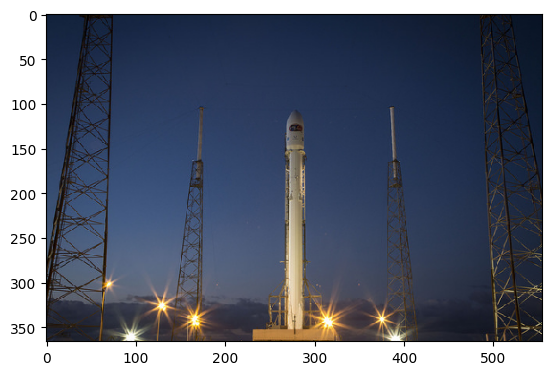

In [12]:
#Se lee la imagen a color (recordar que se lee en BGR en opencv)
img = cv2.imread("res/cohete.png", cv2.IMREAD_COLOR)
#Se transforma de BGR a RGB (utilizando la función cvtColor con el parámetro COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#mostrar la imagen
plt.imshow(img)

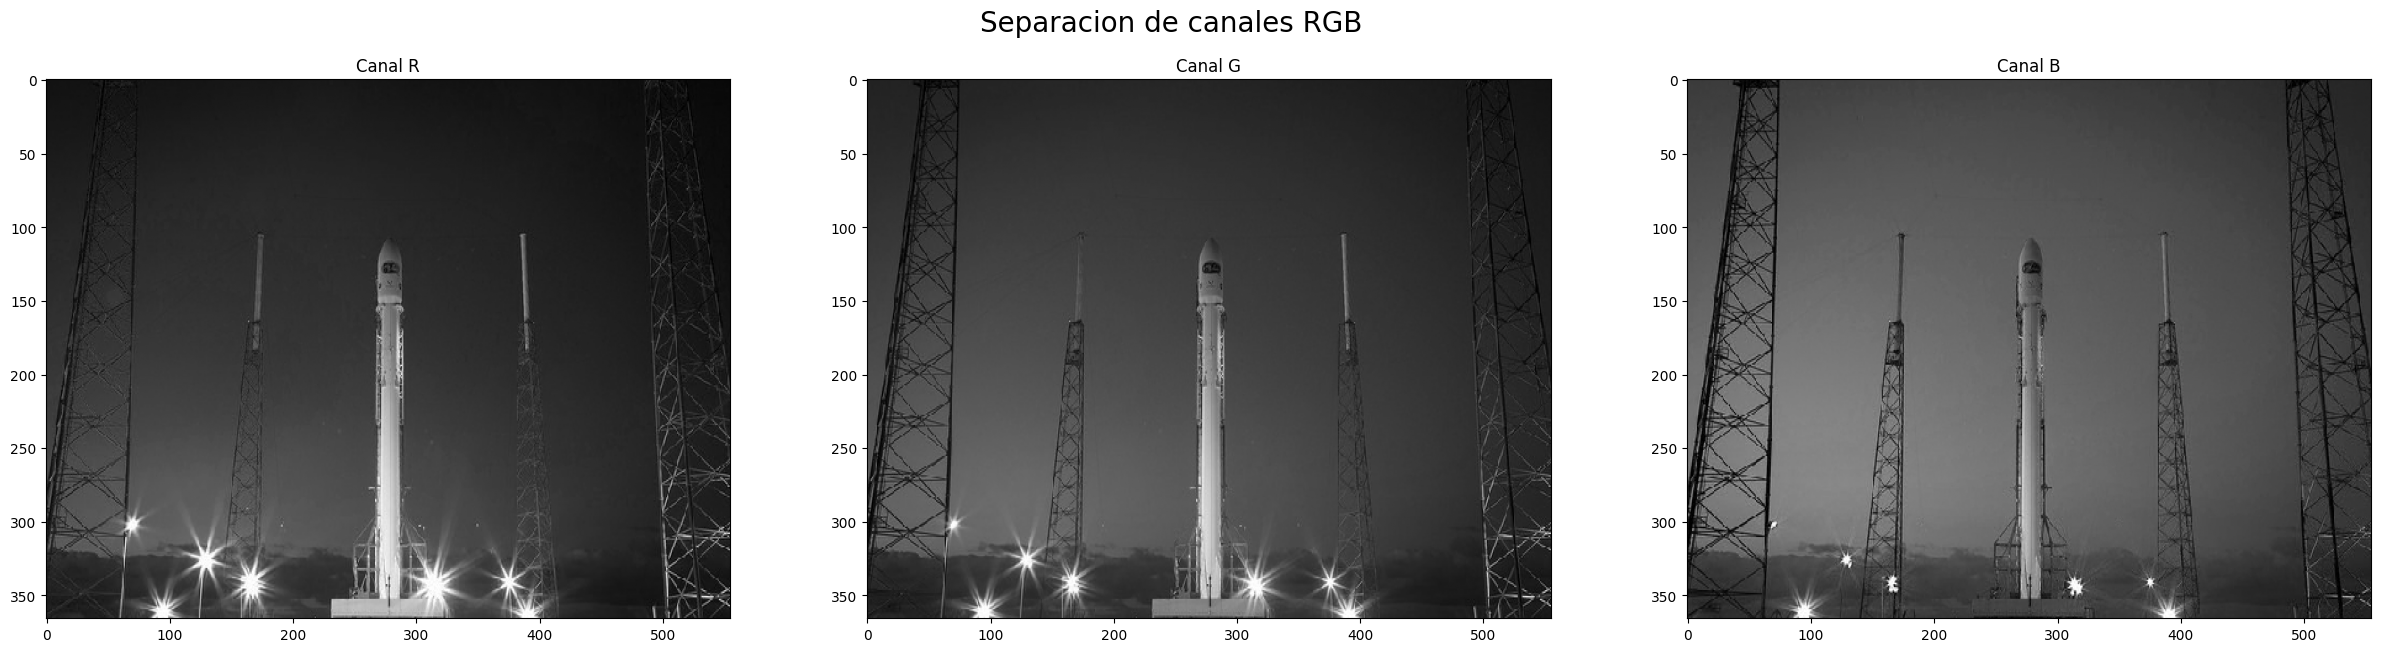

In [13]:
#Como se vio antes, los canales R, G y B se pueden separar de la imagen original accediendo
#en forma de indices
img_R = img[:,:,0]
img_G = img[:,:,1]
img_B = img[:,:,2]
#Se crea el subplot 1x3
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30, 7))
#Se ponen títulos y se muestran las imágenes
fig.suptitle('Separacion de canales RGB', fontsize=20)
ax1.set_title('Canal R')
ax1.imshow(img_R, cmap='gray', aspect='auto')
ax2.set_title('Canal G')
ax2.imshow(img_G, cmap='gray', aspect='auto')
ax3.set_title('Canal B')
ax3.imshow(img_B, cmap='gray', aspect='auto')

### Como vemos, distintos canales del RGB revelan distintos niveles de contraste entre los objetos de una imagen... Este es un factor importante a considerar para el resto de la materia.

Por otro lado, se muestran las dimensiones de la imagen RGB, que corresponden a (179,223,<b>3</b>), <b>este último valor indica el número de canales que componen la imagen</b>, ya que nos encontramos en el espacio de color RGB, es posible descomponer la imagen en los canales R, G y B y estudiarlos individualmente.

## Conceptos relacionados con el color

### Matiz (HUE) o Cromaticidad
Es el atributo por la que el color de un objeto se clasifica como rojo, azul, verde o amarillo de acuerdo a la longitud de onda predominante con referencia al espectro visible. 

<img src="res/color_6.png"/>

Cuando uno dice “este objeto es rojo” se está especificando su matiz, pues probablemente el objeto no sea un rojo puro, pero sí predominan las longitudes de onda cercanas al rojo.

### Brillo o Luminosidad
Se refiere a la intensidad del color y se usa para determinar que tan claro u oscuro es un color. Por ejemplo el color Blanco es un color brillante, mientras que el gris es un blanco menos brillante. 


<img src="res/color_7.gif"/>

### Saturación o Intensidad

Se refiere a la pureza relativa o cantidad de luz blanca mezclada con un matiz. La saturación es el “grado de color” que lo diferencia de un gris con el mismo brillo.

<img src="res/color_8.gif"/>

### Matriz brillo-saturación

<img src="res/color_9.png" width="800">

Para normalizar la representación del color, la Commission Internationale l’Éclairage estudió la percepción del color en los humanos y desarrolló, en 1931, un modelo matemático llamado CIE XYZ aproximado por experimentación.

Basándose en que el ojo humano tiene tres tipos de sensores de color (XYZ), este modelo representa todos los colores visibles basándose en la cromaticidad y el brillo.

Eliminado el brillo del espacio de color, la cromaticidad se puede definir con dos parámetros x e y:

# <center> $x = \frac{X}{X + Y + Z}$ </center>

# <center> $y = \frac{Y}{X + Y + Z}$ </center> 

<img src="res/color_10.png"/>

## Modelos de color

Un Modelo de Color es una especificación de un sistema de coordenadas en el que cada color está representado por un único punto.  Existen varias representaciones o modelos de color. Estos modelos los podemos dividir en dos clases.:

Unos son los modelos que están más orientados a los equipos, por ejemplo las cámaras, monitores y televisores, a los que llamaremos **Modelos Sensoriales**. 

Otros son los modelos que se asemejan más a la percepción humana y que, en general, están orientados al procesamiento de imágenes y visión, éstos se denominan **Modelos Perceptuales**. 


## Modelos Sensoriales: 
Existen 4 modelos comúnmente utilizados RGB, CMY, YIQ e YUV.

### Modelo RGB

El modelo RGB es un modelo aditivo, que debe su nombre a las iniciales de los tres colores primarios: Red (rojo), Green (verde) y Blue (azul).

La combinación aditiva de estos colores primarios produce todo el rango de colores representables en RGB.

<img src="res/rgb.png"/>


El modelo RGB es el más utilizado en la práctica. Pero no es completo: existen colores que no se pueden obtener con la combinación de R, G y B. Se puede comprobar en el diagrama cromático CIE:
<img src="res/rgb2.png"/>


### Modelo CMY

El modelo CMY es usado ciertos aplicaciones, como por ejemplo en pintura e impresión de imágenes. El modelo CMY (o CMYK) está basado en un modelo sustractivo y en la práctica, no llega a producir negro, sino una especie de gris.

<img src="res/cmy.png"/>

### RGB vs CMY



(156, 156, 3)


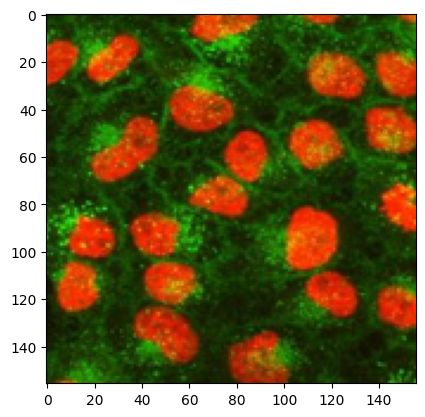

In [14]:
#Leer la imagen en BGR
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)
#La convierte a RGB
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
print(img_rgb.shape)

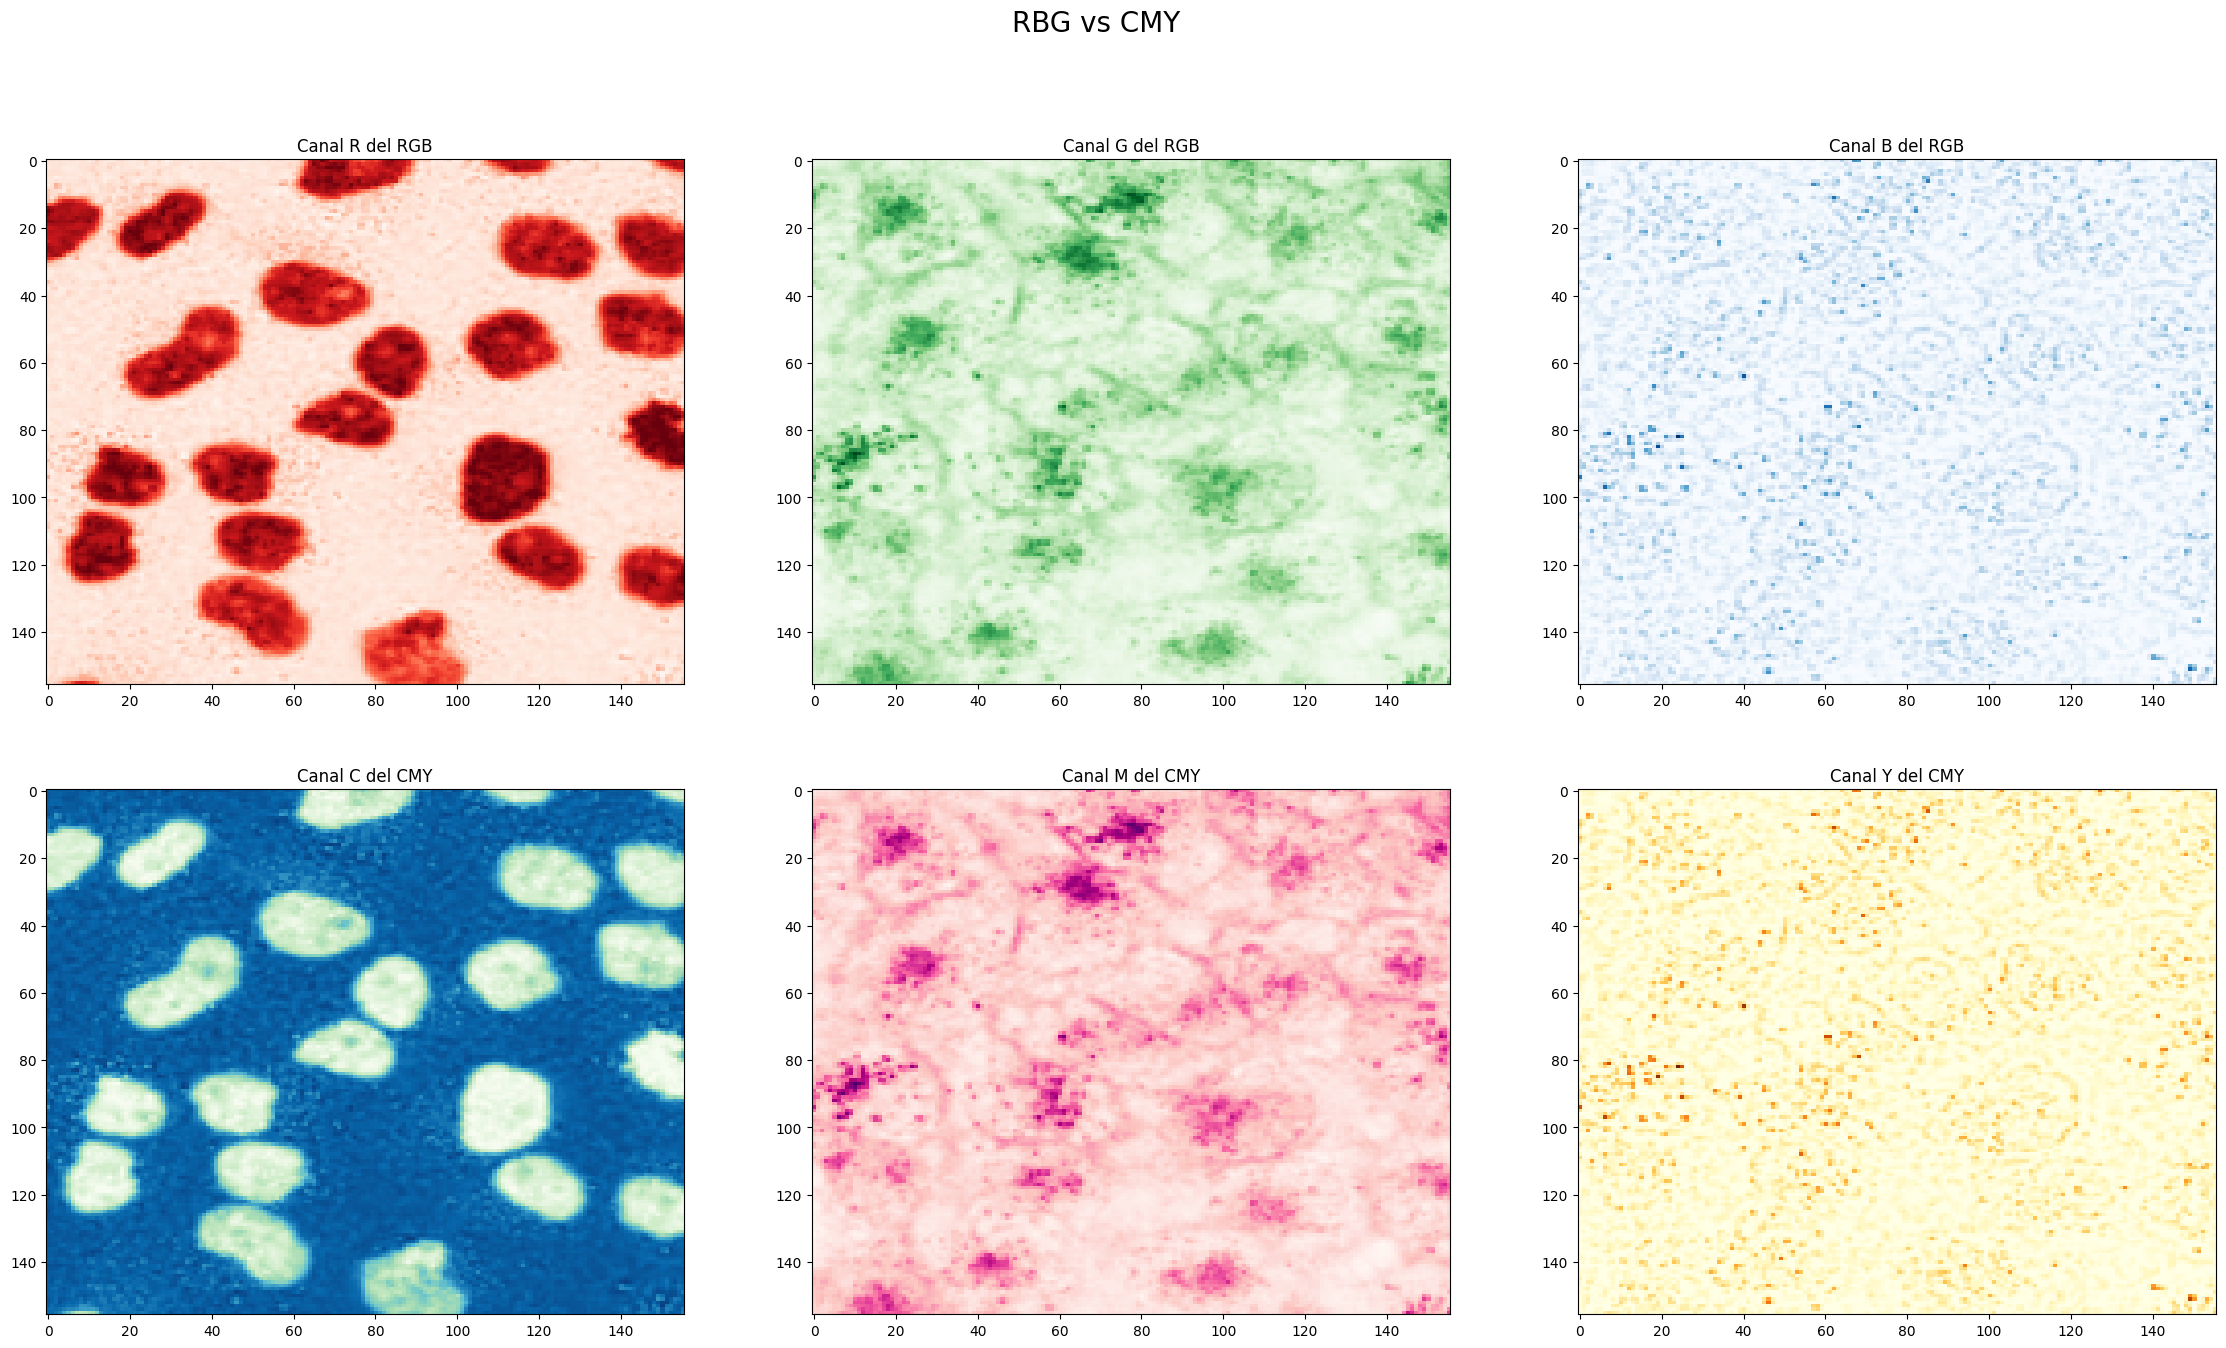

In [15]:
#Aquí se descompone cada canal de la imagen
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtiene cada canal del espacio CMY con una transformación lineal
#a los canales R, G y B
img_C = 255 - img_rgb[:,:,0]
img_M = 255 - img_rgb[:,:,1]
img_Y = 255 - img_rgb[:,:,2]

#Se crea un subplot de 2x3, para mostrar las 6 imágenes y compararlas.
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs CMY', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal C del CMY')
ax4.imshow(img_C, cmap='GnBu', aspect='auto')
ax5.set_title('Canal M del CMY')
ax5.imshow(img_G, cmap='RdPu', aspect='auto')
ax6.set_title('Canal Y del CMY')
ax6.imshow(img_B, cmap='YlOrBr', aspect='auto')

### Modelo YIQ

El modelo YIQ  separa la información de intensidad o luminancia (Y) de la información de color (I, Q). Es un modelo que antiguamente usaba el estándar de televisión NTSC. 

<img src="res/yiq.png"/>

### RGB vs YIQ

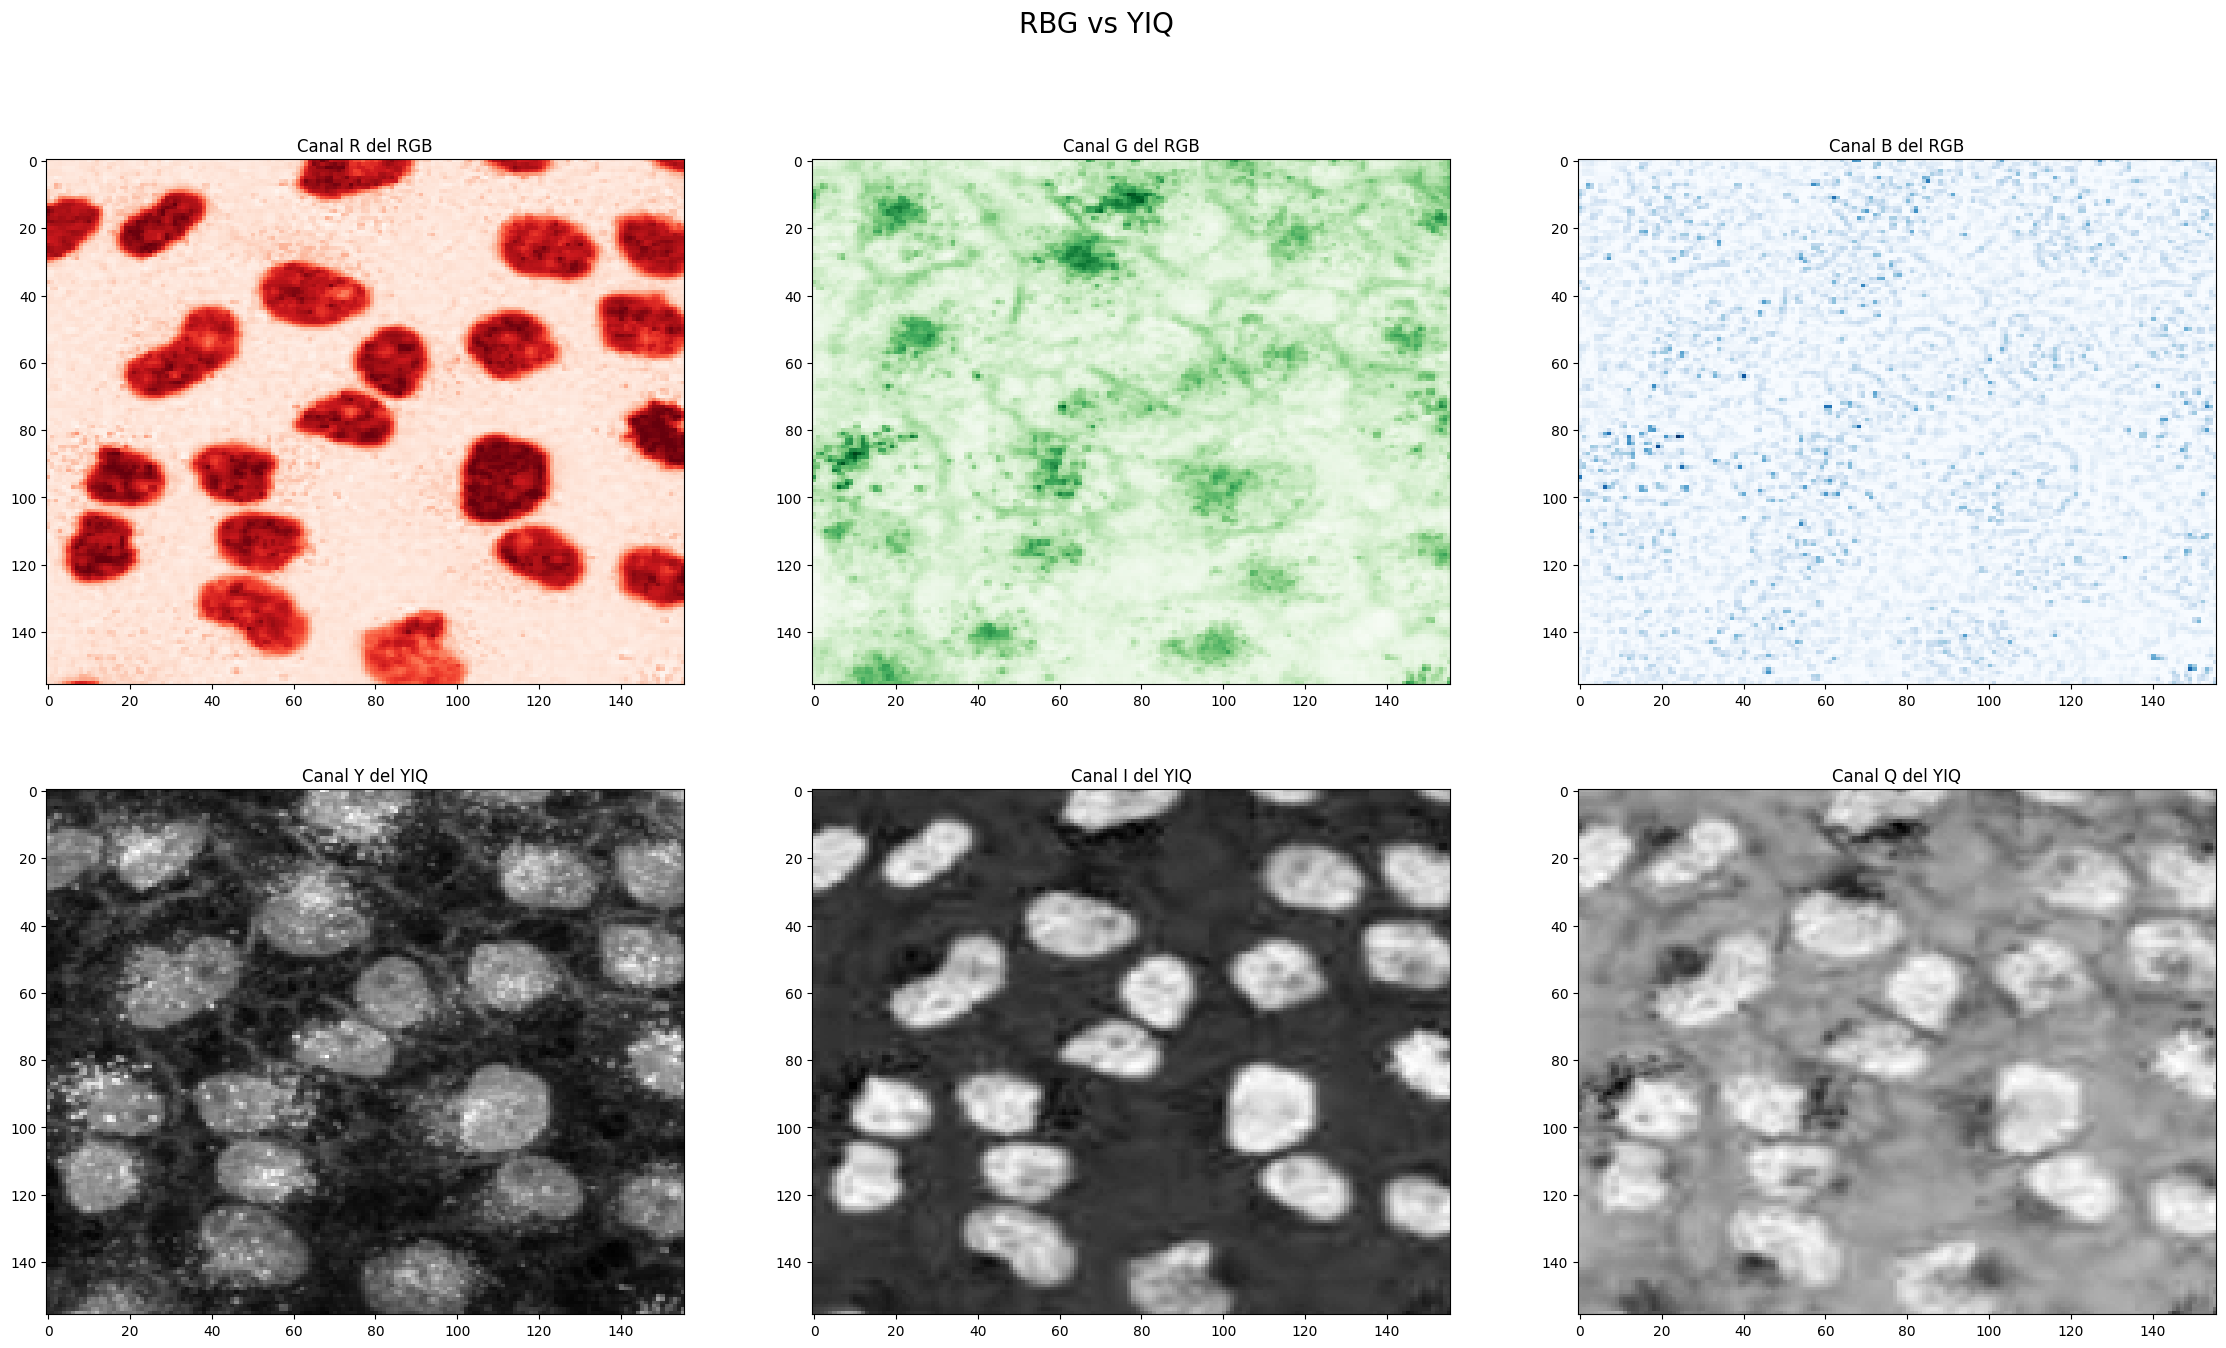

In [16]:
#Se lee la imagen, se descompone en los canales RGB
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Se obtienen los canales YIQ mediante una transformación lineal
img_Y = 0.299*img_R + 0.587*img_G + 0.114*img_B
img_I = 0.596*img_R - 0.274*img_G - 0.322*img_B
img_Q = 0.211*img_R - 0.523*img_G + 0.312*img_B
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YIQ', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YIQ')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal I del YIQ')
ax5.imshow(img_I, cmap='gray', aspect='auto')
ax6.set_title('Canal Q del YIQ')
ax6.imshow(img_Q, cmap='gray', aspect='auto')

### Modelo YUV

El modelo YUV permite utilizar un ancho de banda reducido para los componentes de crominancia, de esta forma, hace que los errores de transmisión o las imperfecciones de compresión se oculten más eficientemente a la percepción humana que usando una representación RGB "directa".


<img src="res/yuv.png"/>
<img src="res/yuv2.png"/>

### RGB vs YUV

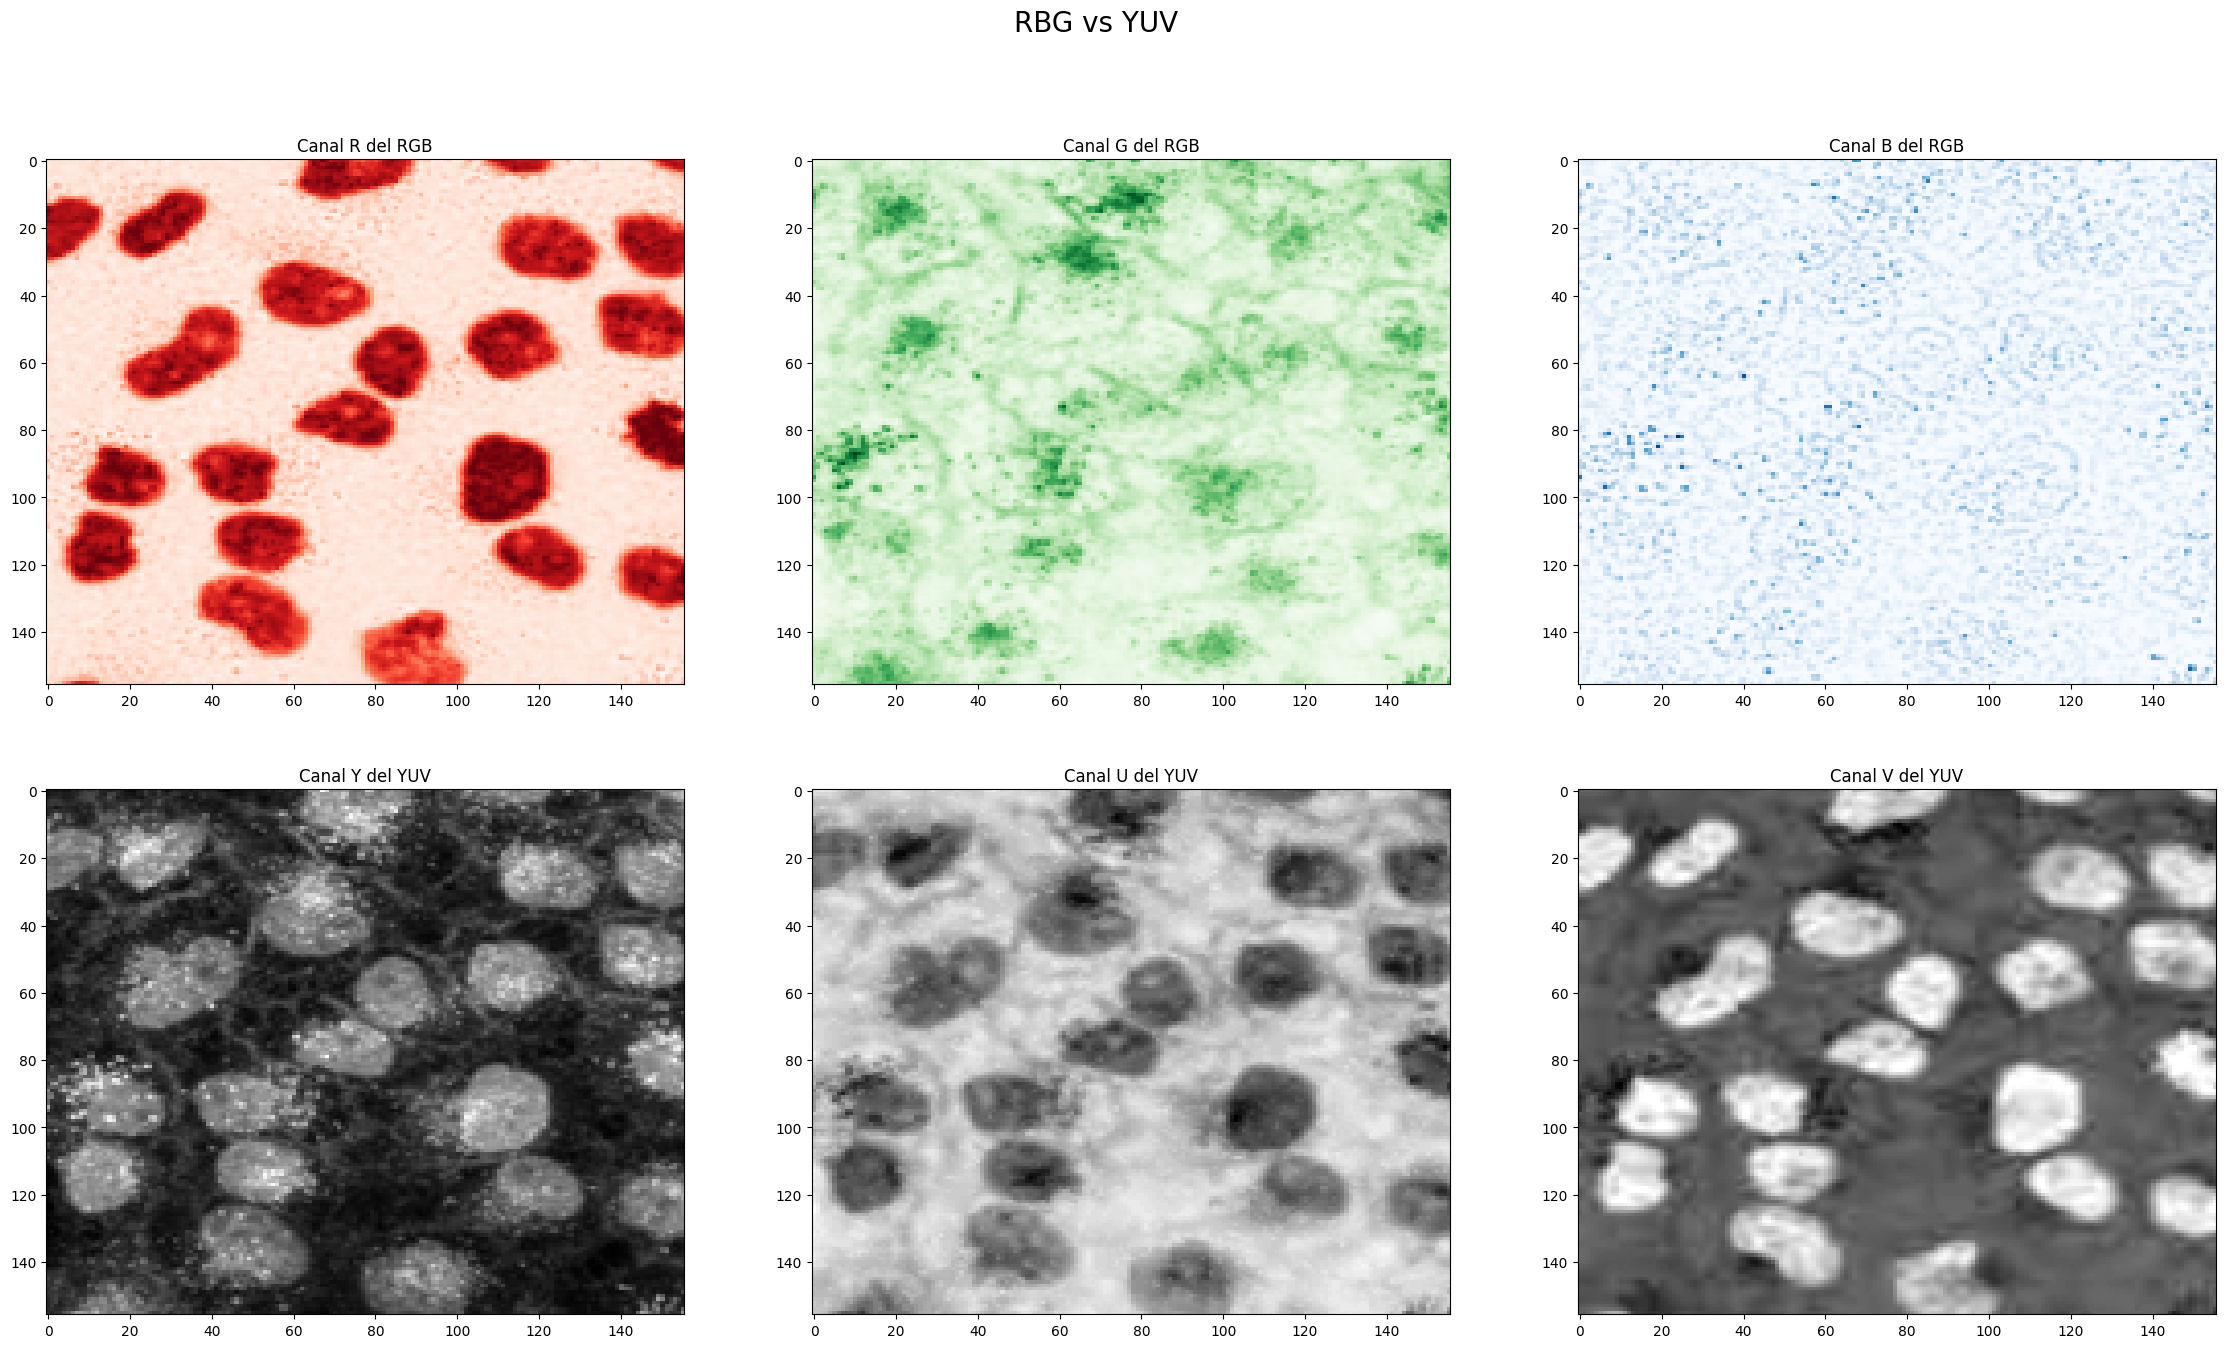

In [17]:
#Leer la imagen y pasarla a RGB
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)

img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Separar el espacio de color YUV en sus canales individuales
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

img_Y = img_yuv[:,:,0]
img_U =  img_yuv[:,:,1]
img_V = img_yuv[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs YUV', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Y del YUV')
ax4.imshow(img_Y, cmap='gray', aspect='auto')
ax5.set_title('Canal U del YUV')
ax5.imshow(img_U, cmap='gray', aspect='auto')
ax6.set_title('Canal V del YUV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

## Modelos Perceptuales: 

Tienen cierta similitud con la percepción humana. Se trata de métodos en los que la representación del componente de color no es lineal.

### Modelos HSL y HSV: 

Los modelos HSL y HSV (o HSI) están pensados para ser fácilmente interpretables y legibles por un humano, usan términos más familiares cuando hablamos de color.

**Matiz de un color**: Su ángulo dentro de la rueda cromática. También, se puede definir como la frecuencia dominante del espectro.

**Saturación**: Diferencia del color respecto a un gris con la misma intensidad. Cuanto más diferente, más saturado. 

**Brillo, Luminosidad o Valor**: Cualidad de ser más claro o más oscuro.



<center>Rueda cromática</center>
<img src="res/rueda_cromatica.png"/>

<img src="res/hsv_hsl.png"/>

### Conversión RGB -> HSL y HSV:

<img src="res/hsv_hsl2.png"/>

### Conversión RGB -> HSL 

Para convertir RGB a HSL, seguimos el proceso descrito anteriormente. Sin embargo, hay que tener en cuenta que el Mátiz (H) va de 0 a 360 grados.

Importante:

* La conversión asume que los valores RGB están entre 0 y 1.

* La conversión da lugar a ángulos negativos, que aveces tendremos que convertir al ángulo positivo equivalente.

In [18]:
#Normalizar la imagen
img = cv2.imread("res/alce.png", cv2.IMREAD_COLOR) 
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb = img_rgb.astype(np.float32)/255  
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

print(img_R)

[[0.8156863  0.8156863  0.8156863  ... 0.7921569  0.79607844 0.7882353 ]
 [0.81960785 0.8156863  0.8156863  ... 0.7921569  0.79607844 0.7882353 ]
 [0.81960785 0.8156863  0.8156863  ... 0.79607844 0.79607844 0.7882353 ]
 ...
 [0.6784314  0.6313726  0.5803922  ... 0.6509804  0.6627451  0.654902  ]
 [0.6627451  0.6313726  0.5921569  ... 0.6156863  0.68235296 0.6784314 ]
 [0.6784314  0.6392157  0.6156863  ... 0.60784316 0.6901961  0.67058825]]


[[216.52174  216.52174  216.52174  ... 206.4      204.54546  205.38461 ]
 [214.73685  210.       210.       ... 201.81818  202.85715  202.5     ]
 [214.73685  210.       210.       ... 207.27274  205.7143   205.      ]
 ...
 [ 25.07463   25.312496  26.129028 ...  26.301367  24.705887  23.999998]
 [ 25.588238  25.970148  23.999998 ...  25.454542  27.042257  23.013702]
 [ 27.123291  26.19718   24.70588  ...  24.1791    26.842108  21.89189 ]]


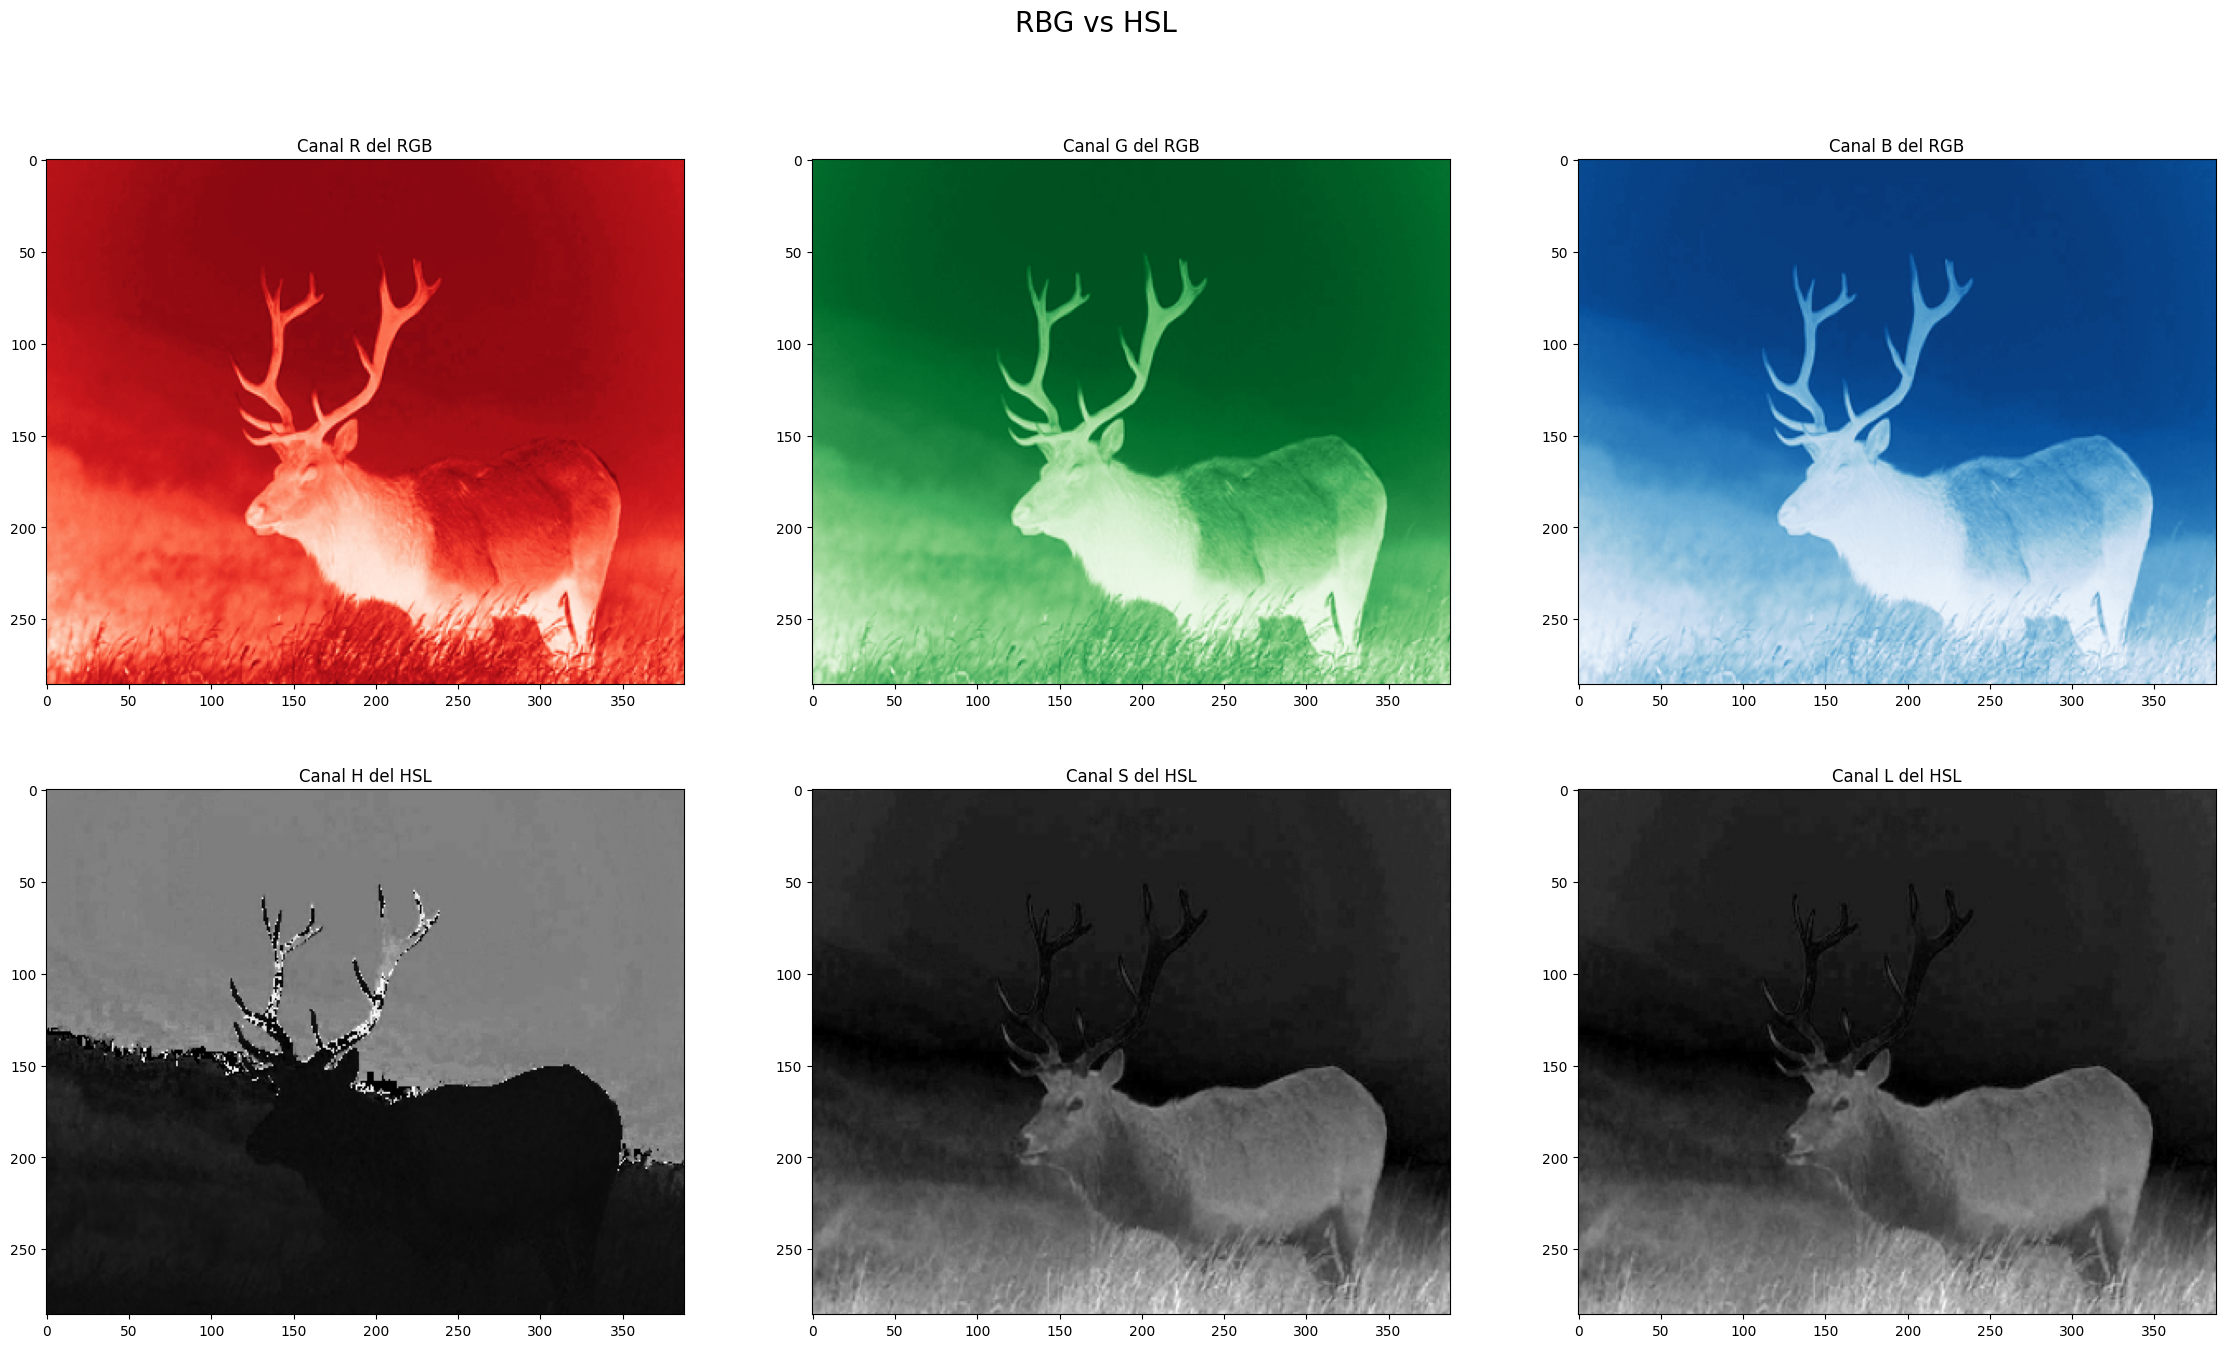

In [19]:
#Para la conversión RGB - HSL debe garantizarse que las matrices coincidan en tamaño
#y tipo de datos
tam = np.shape(img_rgb)
img_hsl =np.zeros((tam), dtype=np.float32)
#Convertir la imagen RGB a HSL canal por canal y guardarla en una matriz
#que representa la nueva imagen
#recorrer las filas y las columnas de la matriz tam
for i in range(tam[0]):
    for j in range(tam[1]):
        #sacar el máximo y el mínimo valor al recorrer las filas y columnas
        max_val = np.max(img_rgb[i][j])
        min_val = np.min(img_rgb[i][j])
        #crear los canales S y L del espacio HSL mediante transformaciones lineales
        s = max_val - min_val
        l = s/2
        #asignación de los canales a la matriz img_hsl
        img_hsl[i][j][1] = s
        img_hsl[i][j][2] = l
        #asignación de valores al canal H
        if(max_val==min_val):
            img_hsl[i][j][0] = 0
            continue
        #extracción de los canales del espacio RGB de la imagen
        red = img_rgb[i][j][0]
        green = img_rgb[i][j][1]
        blue = img_rgb[i][j][2]
        #normalización de los datos, en caso de que el vector max_val sea exactamente 
        #igual a uno de los canales del espacio RGB
        if(max_val == red):
            h = (green-blue)*60/(max_val-min_val)
        elif(max_val == green):
            h = (blue-red)*60/(max_val-min_val) + 120
        else:
            h = (red-green)*60/(max_val-min_val) + 240
        #condicional para que cada valor de h esté acotado entre 0 y 360 en cada iteración
        if h >= 0:
            img_hsl[i,j,0]=h
        else:
            img_hsl[i,j,0] = 360.0 - h
#imprimir el canal H                    
print(img_hsl[:,:,0])
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal H del HSL')
ax4.imshow(img_hsl[:,:,0], cmap='gray', aspect='auto')
ax5.set_title('Canal S del HSL')
ax5.imshow(img_hsl[:,:,1], cmap='gray', aspect='auto')
ax6.set_title('Canal L del HSL')
ax6.imshow(img_hsl[:,:,2], cmap='gray', aspect='auto')

### RGB vs HSV

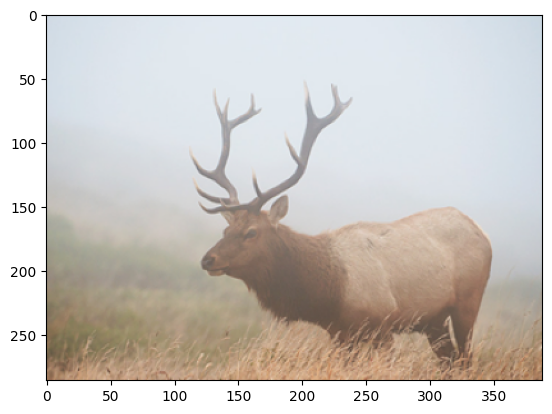

In [20]:
#Leer imagen del alce
img = cv2.imread("res/alce.png", cv2.IMREAD_COLOR)
#Convertir a RGB e imprimir
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Se puede descomponer el espacio HSV en sus respectivos canales

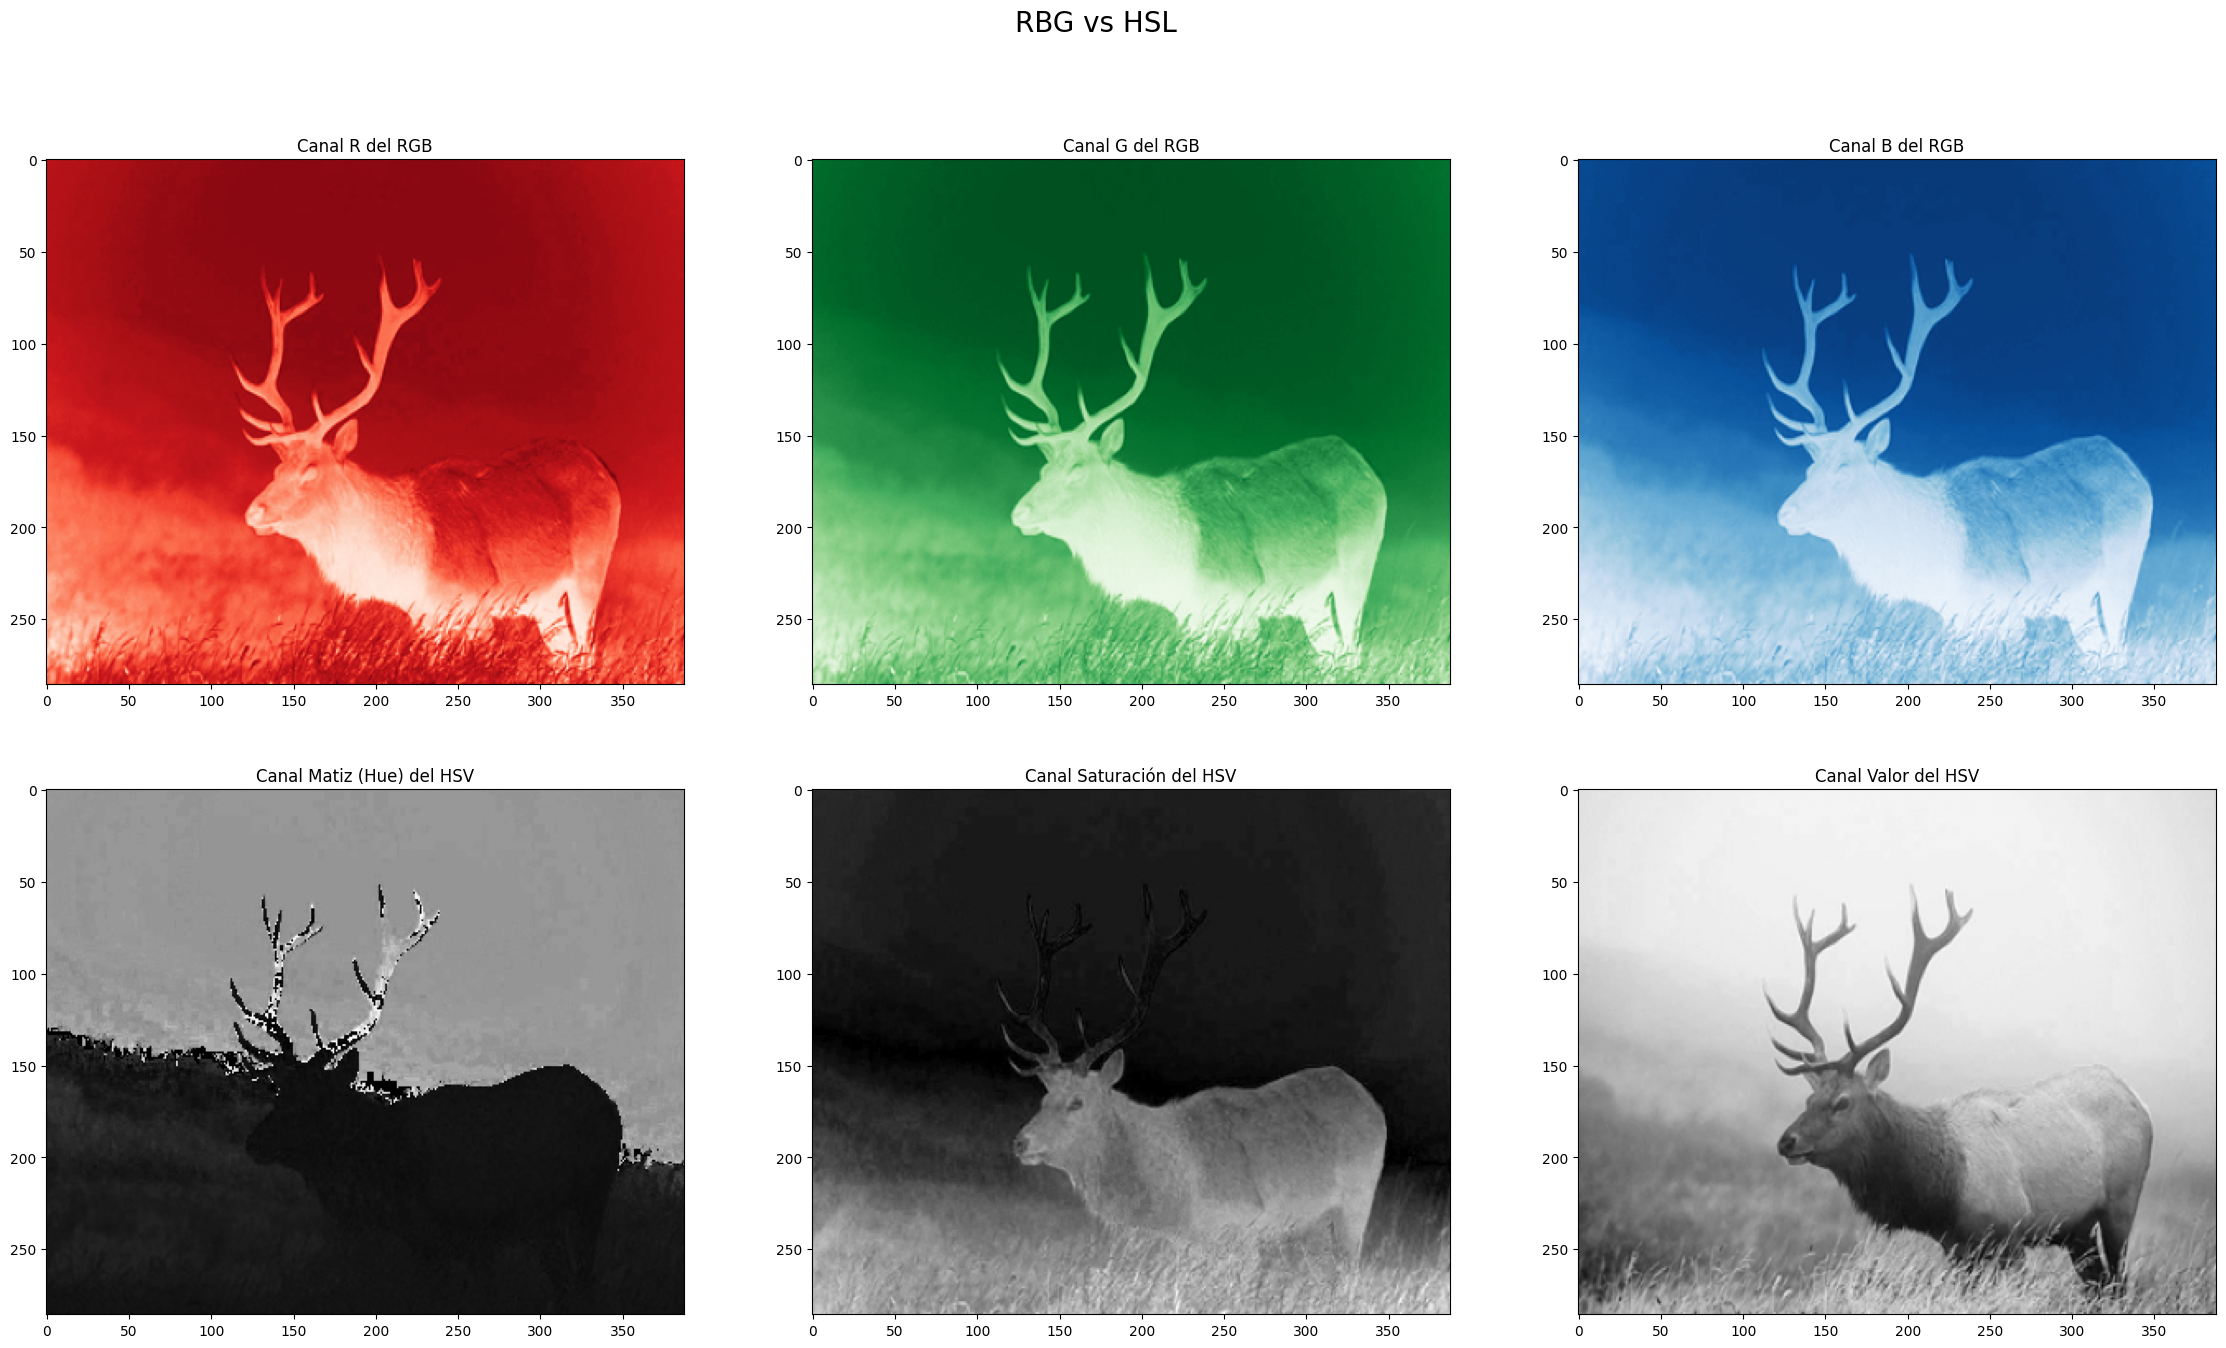

In [21]:
#Leer cada canal del espacio RGB de la imagen
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Conversión automática con la función cv2.cvtColor al canal HSV
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

img_H = img_hsv[:,:,0]
img_S =  img_hsv[:,:,1]
img_V = img_hsv[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs HSL', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Matiz (Hue) del HSV')
ax4.imshow(img_H, cmap='gray', aspect='auto')
ax5.set_title('Canal Saturación del HSV')
ax5.imshow(img_S, cmap='gray', aspect='auto')
ax6.set_title('Canal Valor del HSV')
ax6.imshow(img_V, cmap='gray', aspect='auto')

<img src="res/hsv_hsl3.png">

### Modelo L\*A\*B

Un modelo en el que L almacena toda la información sobre luminosidad a\* y b\* almacenan la información de color.


* En Adobe Photoshop, la edición de imágenes usando "Lab" es CIELAB D50.
* En Perfiles ICC, el espacio de color Lab usado como el espacio de conexión de perfil es CIELAB D50.
* En archivos TIFF, el espacio de color Lab es CIELAB.
* En documentos PDF, Lab es CIELAB.


El CIE L\*a\*b\* (CIELAB) es el modelo cromático usado normalmente para describir todos los colores que puede percibir el ojo humano.

https://sobrecolores.blogspot.com/2010/03/modo-de-color-lab.html

<img src="res/lab.png"/>

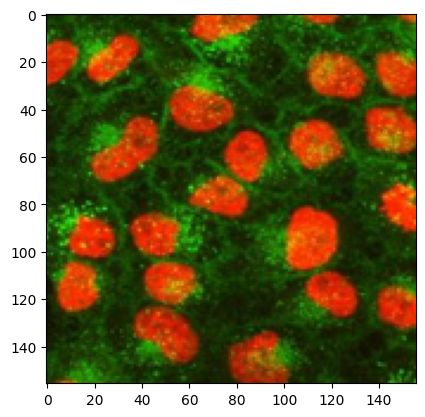

In [23]:
#Lectura, conversión a RGB e impresión de la imagen
img = cv2.imread("res/cells.png", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

Análogamente al canal HSV, se puede descomponer el espacio LAB

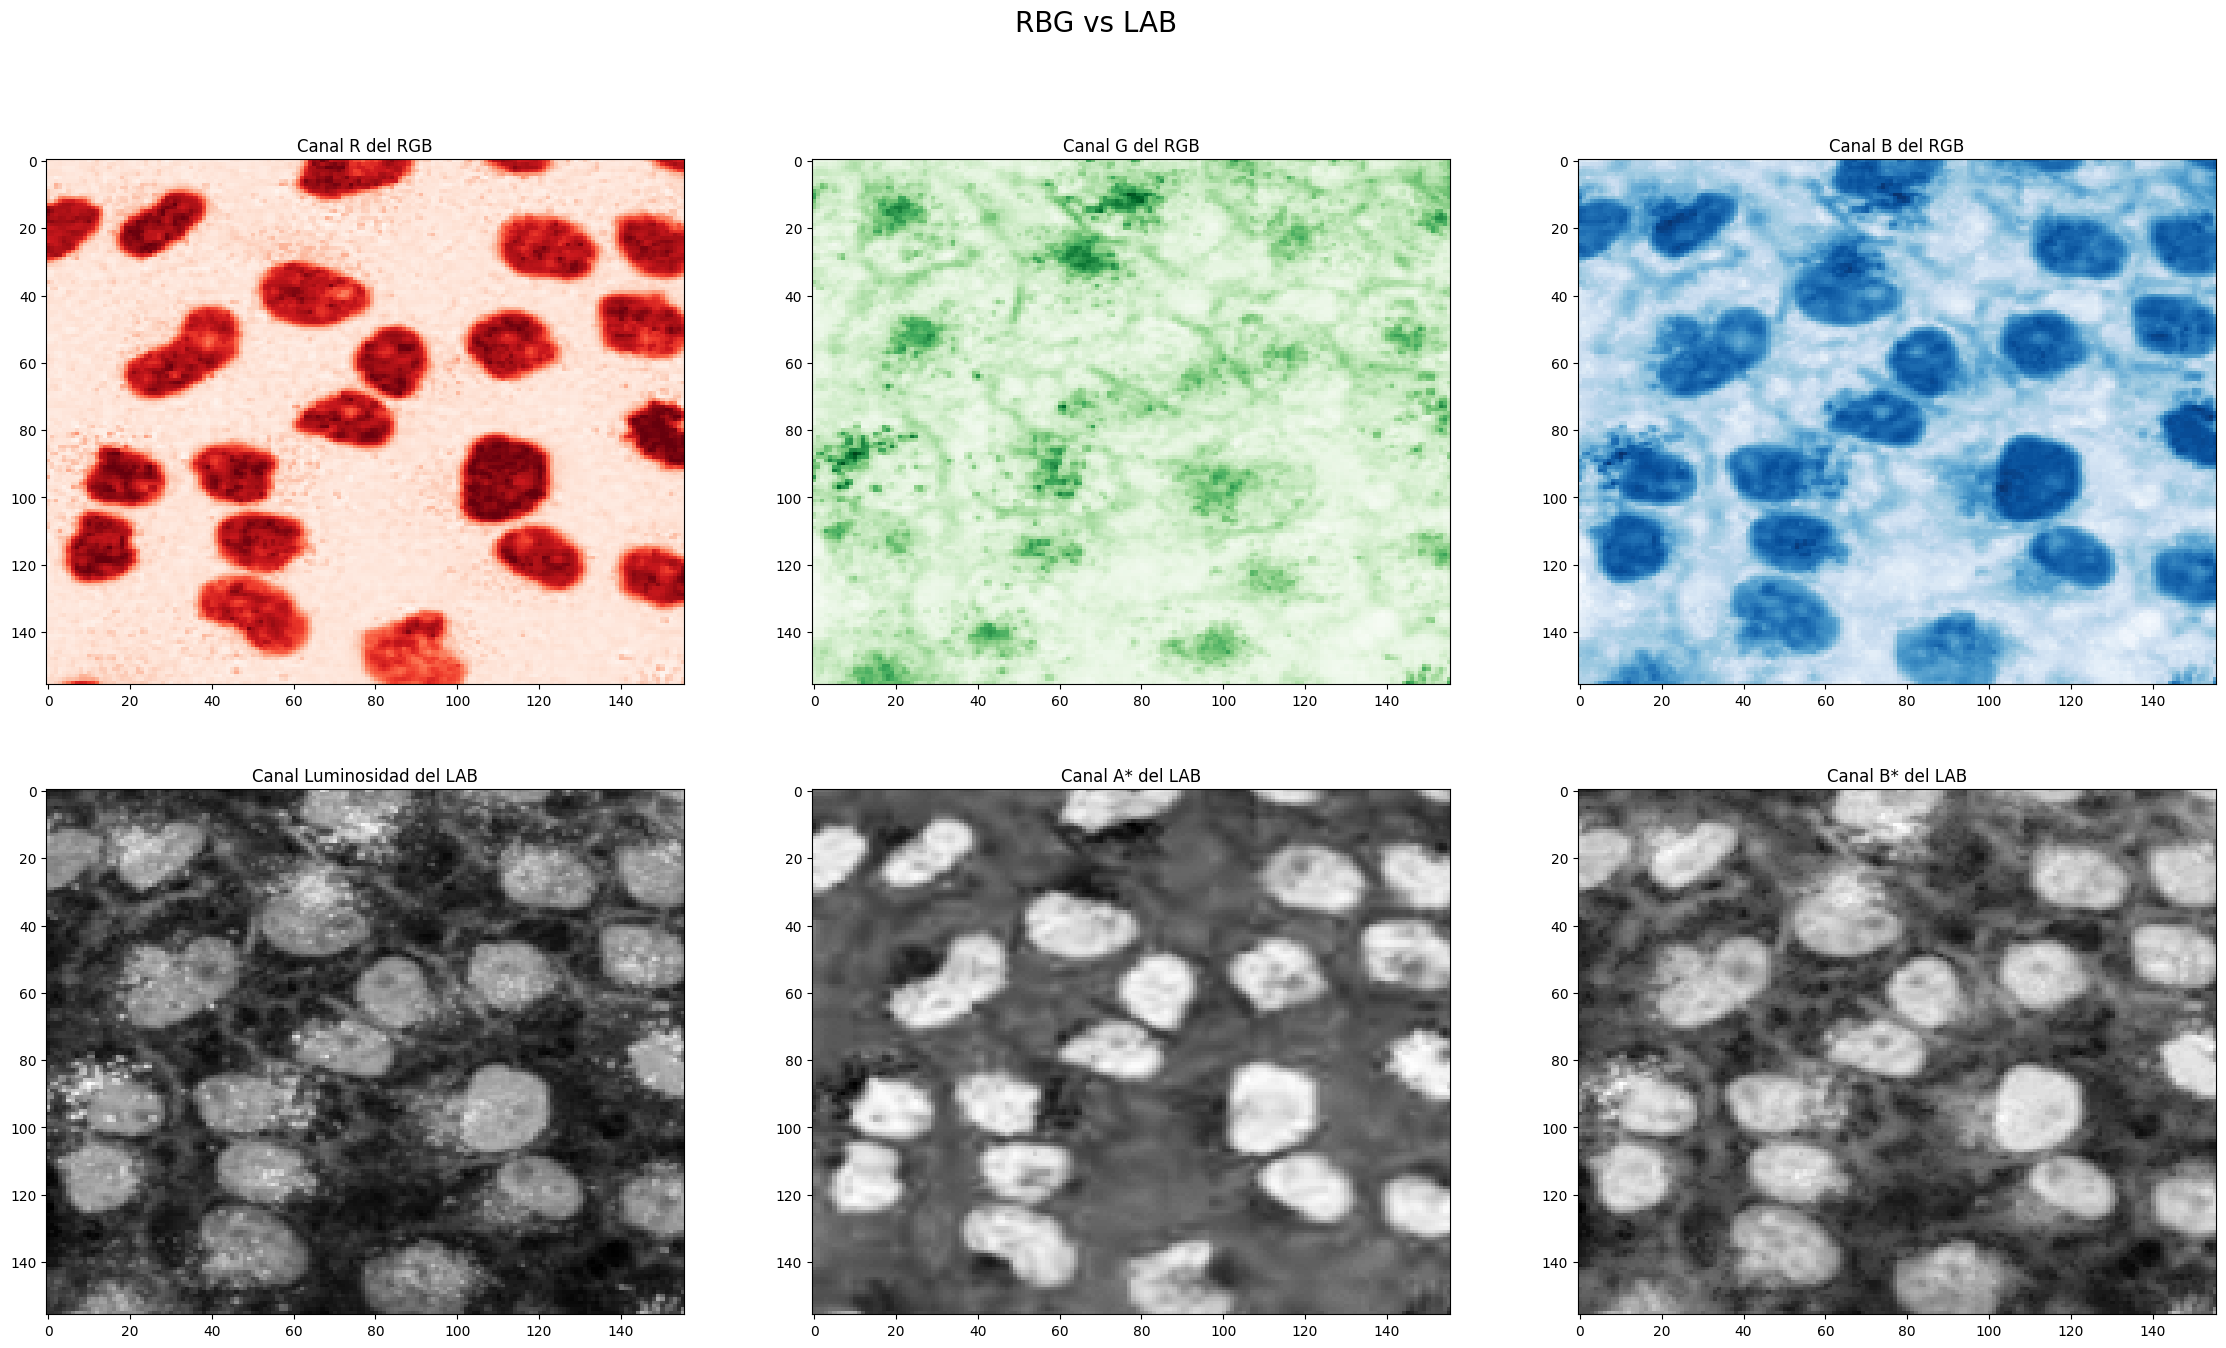

In [24]:
#Lectura de cada canal correspondiente al espacio RGB
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]
#Lectura de cada canal correspondiente al espacio LAB
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_B = img_lab[:,:,2]
#Mostrar y comparar imágenes
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(28, 15))
fig.suptitle('RBG vs LAB', fontsize=20)
ax1.set_title('Canal R del RGB')
ax1.imshow(img_R, cmap='Reds', aspect='auto')
ax2.set_title('Canal G del RGB')
ax2.imshow(img_G, cmap='Greens', aspect='auto')
ax3.set_title('Canal B del RGB')
ax3.imshow(img_B, cmap='Blues', aspect='auto')
ax4.set_title('Canal Luminosidad del LAB')
ax4.imshow(img_L, cmap='gray', aspect='auto')
ax5.set_title('Canal A* del LAB')
ax5.imshow(img_A, cmap='gray', aspect='auto')
ax6.set_title('Canal B* del LAB')
ax6.imshow(img_B, cmap='gray', aspect='auto')



### ¿Qué pasa si intentamos visualizar una imagen en un espacio distinto al RGB?

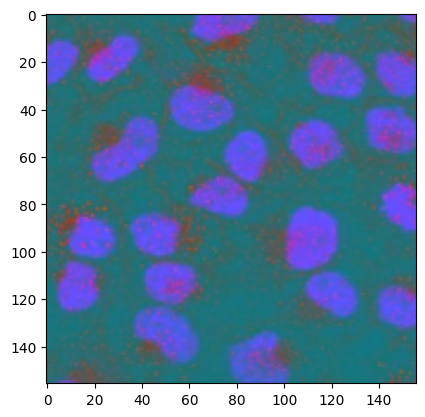

In [25]:
plt.imshow(img_yuv)

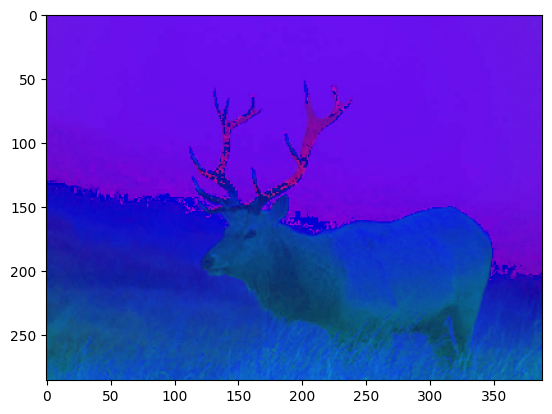

In [26]:
plt.imshow(img_hsv)

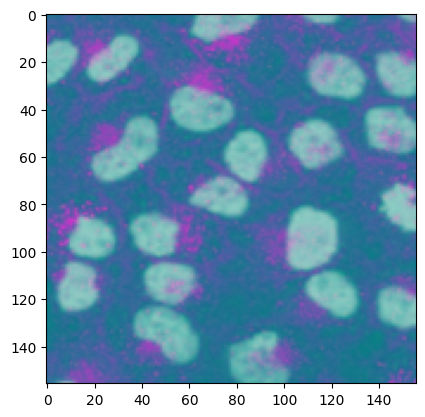

In [27]:
plt.imshow(img_lab)

# ¿Cómo utilizamos los distintos modelos de color para un sistema de visión?

El color es un fenómeno ligado a la percepción humana.

Existen muchos modelos de color, algunos creados con fines específicos.

Aunque externamente (entrada/salida) trabajemos normalmente con el modelo RGB, para realizar ciertas operaciones puede ser adecuado usar otros modelos de color:

* Transformar de RGB al otro modelo.
* Operar en el otro modelo.
* Transformar el resultado en el otro modelo a RGB.
* Estudiar, decidir y utilizar el modelo más adecuado a cada aplicación.